In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

# 读取数据
data = pd.read_csv(
    "E:\Workspace\jupyter_notebook\\notebook_idata_lesson01\kobe\data.csv"
)

print(data.shape)
data[:3]


(30697, 25)


,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3


In [81]:
# shot_made_flag属性
print(data["shot_made_flag"].unique())
# 去除null值
data = data[pd.notnull(data["shot_made_flag"])]
print(data.shape)


[nan  0.  1.]
(25697, 25)


Text(0.5,1,'lat and lon')

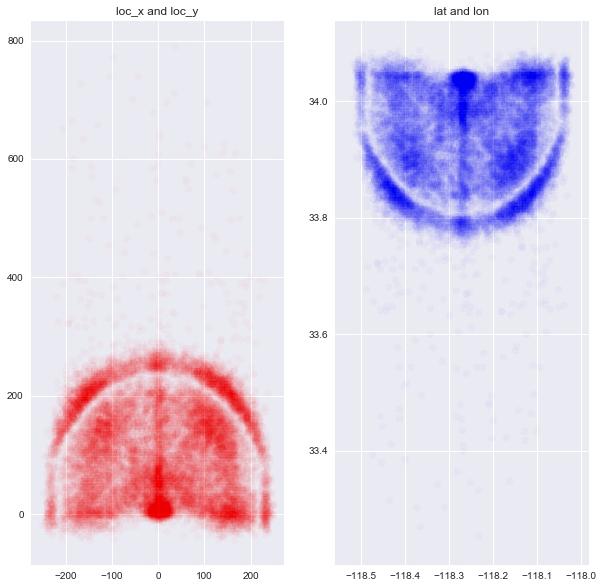

In [82]:
# loc_x和loc_y  lat和lon
sns.set()
alpha = 0.02
plt.figure(figsize=(10, 10))

# loc_x和loc_y
plt.subplot(121)  #121表示，1行2列的第一个
plt.scatter(data["loc_x"], data["loc_y"], color="R", alpha=alpha)
plt.title("loc_x and loc_y")

# lat和lon
plt.subplot(122)
plt.scatter(data["lon"], data["lat"], color="B", alpha=alpha)
plt.title("lat and lon")


In [83]:
# 计算距离
data["dist"] = np.sqrt(data["loc_x"] ** 2 + data["loc_y"] ** 2)

# 转换为极坐标
loc_x_zero = data["loc_x"] == 0
data['angle'] = np.array([0] * len(data))
data['angle'][~loc_x_zero] = np.arctan(data['loc_y'][~loc_x_zero] / data['loc_x'][~loc_x_zero])
data['angle'][loc_x_zero] = np.pi / 2


D:\Coding\Anaconda3\envs\idata\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
D:\Coding\Anaconda3\envs\idata\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [84]:
# minutes_remaining和seconds_remaining
data["remaining_time"] = data["minutes_remaining"] * 60 + data["seconds_remaining"]


In [85]:
# action_type,combined_shot_type,shot_type
print(data["action_type"].unique())
print(data["combined_shot_type"].unique())
print(data["shot_type"].unique())
print(data["shot_type"].value_counts())


['Jump Shot' 'Driving Dunk Shot' 'Layup Shot' 'Running Jump Shot'
 'Reverse Dunk Shot' 'Slam Dunk Shot' 'Driving Layup Shot'
 'Turnaround Jump Shot' 'Reverse Layup Shot' 'Tip Shot'
 'Running Hook Shot' 'Alley Oop Dunk Shot' 'Dunk Shot'
 'Alley Oop Layup shot' 'Running Dunk Shot' 'Driving Finger Roll Shot'
 'Running Layup Shot' 'Finger Roll Shot' 'Fadeaway Jump Shot'
 'Follow Up Dunk Shot' 'Hook Shot' 'Turnaround Hook Shot' 'Jump Hook Shot'
 'Running Finger Roll Shot' 'Jump Bank Shot' 'Turnaround Finger Roll Shot'
 'Hook Bank Shot' 'Driving Hook Shot' 'Running Tip Shot'
 'Running Reverse Layup Shot' 'Driving Finger Roll Layup Shot'
 'Fadeaway Bank shot' 'Pullup Jump shot' 'Finger Roll Layup Shot'
 'Turnaround Fadeaway shot' 'Driving Reverse Layup Shot'
 'Driving Slam Dunk Shot' 'Step Back Jump shot' 'Turnaround Bank shot'
 'Reverse Slam Dunk Shot' 'Floating Jump shot' 'Putback Slam Dunk Shot'
 'Running Bank shot' 'Driving Bank shot' 'Driving Jump shot'
 'Putback Layup Shot' 'Putback Dun

In [86]:
# season数据
print(data["season"].unique())
data["season"] = data["season"].apply(lambda x: int(x.split("-")[1]))
print(data["season"].unique())


['2000-01' '2001-02' '2002-03' '2003-04' '2004-05' '2005-06' '2006-07'
 '2007-08' '2008-09' '2009-10' '2010-11' '2011-12' '2012-13' '2013-14'
 '2014-15' '2015-16' '1996-97' '1997-98' '1998-99' '1999-00']
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 97 98 99  0]


In [87]:
# team_id和team_name属性
print(data["team_id"].unique())
print(data["team_name"].unique())


[1610612747]
['Los Angeles Lakers']


In [88]:
# matchup和opponent
pd.DataFrame({"matchup": data["matchup"], "opponent": data["opponent"]})

# 这两个数据有相同的意思，可以去掉一个


,matchup,opponent
1,LAL @ POR,POR
2,LAL @ POR,POR
3,LAL @ POR,POR
4,LAL @ POR,POR
5,LAL @ POR,POR
6,LAL @ POR,POR
8,LAL @ POR,POR
9,LAL @ POR,POR
10,LAL @ POR,POR
11,LAL vs. UTA,UTA


Text(0.5,1,'dist and shot_distance')

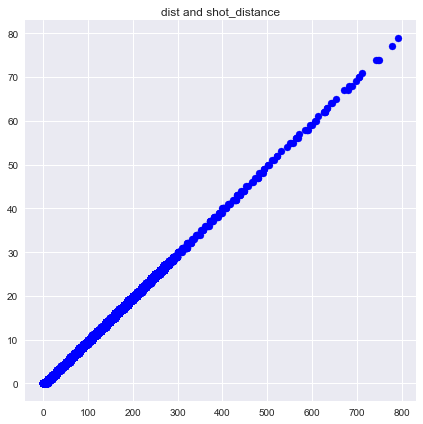

In [89]:
# 之前计算出来的dist字段和shot_distance属性
plt.figure(figsize=(7, 7))

plt.scatter(data["dist"], data["shot_distance"], color="blue")
plt.title("dist and shot_distance")


In [90]:
# shot_zone_area
gs = data.groupby("shot_zone_area")
print(data["shot_zone_area"].value_counts())
print("len(gs)=", len(gs))


Center(C)                11289
Right Side Center(RC)     3981
Right Side(R)             3859
Left Side Center(LC)      3364
Left Side(L)              3132
Back Court(BC)              72
Name: shot_zone_area, dtype: int64
len(gs)= 6


Text(0.5,1,'shot_zone_range')

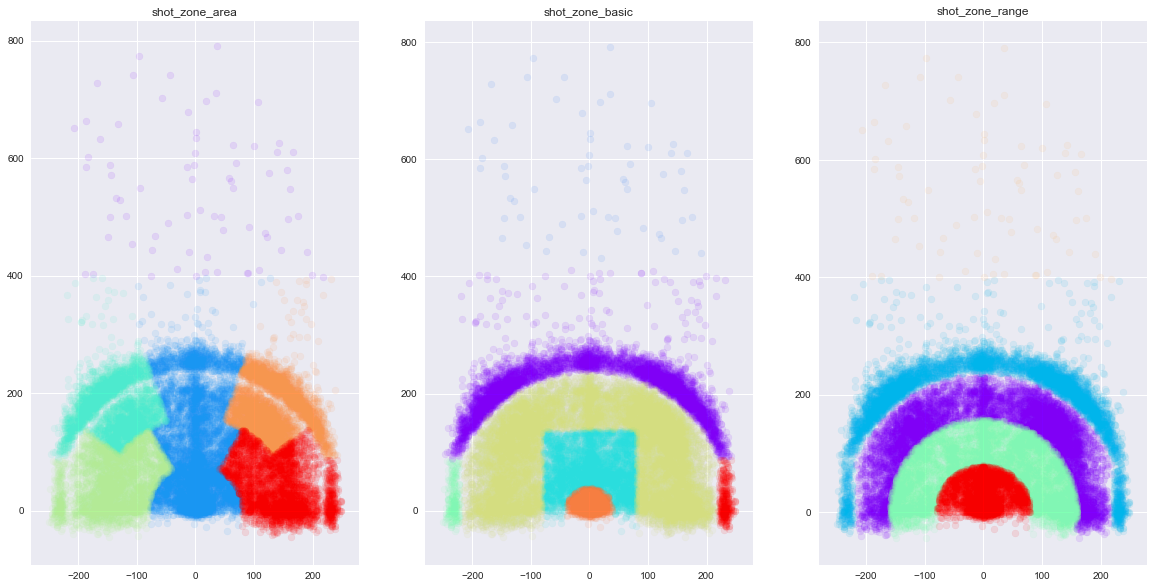

In [92]:
import matplotlib.cm as cm

plt.figure(figsize=(20, 10))


def scatter_plot_by_category(feat):
    alpha = 0.1
    gs = data.groupby(feat)
    cs = cm.rainbow(np.linspace(0, 1, len(gs)))
    for g, c in zip(gs, cs):
        plt.scatter(g[1]["loc_x"], g[1]["loc_y"], color=c, alpha=alpha)


# shot_zone_area
plt.subplot(131)
scatter_plot_by_category("shot_zone_area")
plt.title("shot_zone_area")

# shot_zone_basic
plt.subplot(132)
scatter_plot_by_category("shot_zone_basic")
plt.title("shot_zone_basic")

# shot_zone_range
plt.subplot(133)
scatter_plot_by_category("shot_zone_range")
plt.title("shot_zone_range")


In [93]:
# get_dummies，得到one-hot编码
print(data["combined_shot_type"].value_counts())
pd.get_dummies(data["combined_shot_type"], prefix="combined_shot_type")[0:2]


Jump Shot    19710
Layup         4532
Dunk          1056
Tip Shot       152
Hook Shot      127
Bank Shot      120
Name: combined_shot_type, dtype: int64


,combined_shot_type_Bank Shot,combined_shot_type_Dunk,combined_shot_type_Hook Shot,combined_shot_type_Jump Shot,combined_shot_type_Layup,combined_shot_type_Tip Shot
1,0,0,0,1,0,0
2,0,0,0,1,0,0


In [94]:
# get_dummies
categorical_vars = ["action_type", "combined_shot_type", "shot_type", "opponent", "period", "season"]
for var in categorical_vars:
    data = pd.concat([data, pd.get_dummies(data[var], prefix=var)], axis=1)
    data = data.drop(var, axis=1)


In [95]:
# drop一些列
drops = ['shot_id', 'team_id', 'team_name', 'shot_zone_area', 'shot_zone_range', 'shot_zone_basic',
         'matchup', 'lon', 'lat', 'seconds_remaining', 'minutes_remaining',
         'shot_distance', 'loc_x', 'loc_y', 'game_event_id', 'game_id', 'game_date']
for drop in drops:
    data = data.drop(drop, axis=1)


In [96]:
train_x = data.drop("shot_made_flag", axis=1)
train_y = data["shot_made_flag"]


In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, log_loss
from sklearn.cross_validation import KFold
import time
import numpy as np

# 开始点和结束点是10的幂，等比数列
range_m = np.logspace(0, 2, num=5).astype(int)
range_m


array([  1,   3,  10,  31, 100])

In [99]:
min_score = 100000
best_n = 0
scores_n = []
range_n = np.logspace(0, 2, num=5).astype(int)

print('Finding best n_estimators for RandomForestClassifier...')
for n in range_n:
    print("the number of trees:{0}".format(n))
    t1 = time.time()

    rfc_score = 0
    # 随机森林算法
    rfc = RandomForestClassifier(n_estimators=n)
    for train_k, test_k in KFold(len(train_x), n_folds=10, shuffle=True):
        rfc.fit(train_x.iloc[train_k], train_y.iloc[train_k])

        pred = rfc.predict(train_x.iloc[test_k])
        rfc_score += log_loss(train_y.iloc[test_k], pred) / 10

    scores_n.append(rfc_score)
    if rfc_score < min_score:
        min_score = rfc_score
        best_n = n

    t2 = time.time()
    print("Done processing {0} trees {1:.3f}sec".format(n, t2 - t1))
print(best_n, min_score)

print('Finding best max_depth for RandomForestClassifier...')
min_score = 100000
best_m = 0
scores_m = []
range_m = np.logspace(0, 2, num=5).astype(int)
for m in range_m:
    print("the max depth:{0}".format(m))
    t1 = time.time()

    rfc_score = 0
    rfc = RandomForestClassifier(max_depth=m, n_estimators=best_n)
    for train_k, test_k in KFold(len(train_x), n_folds=10, shuffle=True):
        rfc.fit(train_x.iloc[train_k], train_y.iloc[train_k])
        pred = rfc.predict(train_x.iloc[test_k])
        rfc_score += log_loss(train_y.iloc[test_k], pred) / 10
    scores_m.append(rfc_score)
    if rfc_score < min_score:
        min_score = rfc_score
        best_m = m

    t2 = time.time()
    print("Done processing {0} max depth ({1:.3f}sec)".format(m, t2 - t1))
print(best_m, min_score)


Finding best n_estimators for RandomForestClassifier...
the number of trees:1


Done processing 1 trees 1.084sec
the number of trees:3


Done processing 3 trees 2.318sec
the number of trees:10


Done processing 10 trees 6.183sec
the number of trees:31


Done processing 31 trees 15.329sec
the number of trees:100


Done processing 100 trees 51.114sec
100 11.795737340386156
Finding best max_depth for RandomForestClassifier...
the max depth:1


Done processing 1 max depth (4.513sec)
the max depth:3


Done processing 3 max depth (7.847sec)
the max depth:10


Done processing 10 max depth (17.046sec)
the max depth:31


Done processing 31 max depth (41.312sec)
the max depth:100


Done processing 100 max depth (53.900sec)
10 11.030929396768954
